In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas_datareader import DataReader

In [2]:
tickers = ['TSLA', 'XOM', 'JNJ', 'PG', 'ABBV', 'ALB', 'AMZN', 'BA', 'UNH', 'DEO']
prices_df = DataReader(tickers, 'yahoo', '2017-01-01', '2022-11-20')['Adj Close']

In [3]:
returns_df = prices_df.pct_change()[1:]

In [4]:
stocks_weights = [0.10, 0.05, 0.10, 0.30, 0.05, 0.10, 0.10, 0.05, 0.10, 0.05]
print(sum(stocks_weights))

1.0


In [5]:
weighted_returns = returns_df * stocks_weights

In [6]:
portfolio_returns = weighted_returns.sum(axis=1)

In [7]:
mu = np.mean(portfolio_returns)
std = np.std(portfolio_returns)

T = 252
S0 = 146.910004

rand_rets = np.random.normal(mu, std, T) + 1
forecasted_values = S0 * (rand_rets.cumprod())

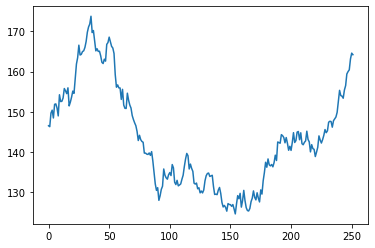

In [8]:
plt.plot(range(0, T), forecasted_values)
plt.show()

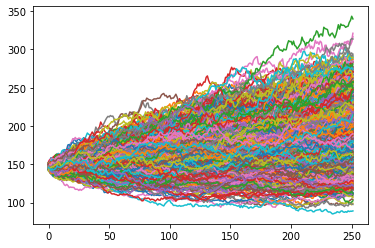

In [9]:
for i in range(0, 1000):
    rand_rets = np.random.normal(mu, std, T) + 1
    forecasted_values = S0 * (rand_rets.cumprod())
    plt.plot(range(T), forecasted_values)
    
plt.show()

Monte Carlo VaR

In [10]:
sim_returns = []

for i in range(10000):
    rand_rets = np.random.normal(mu, std, T)
    sim_returns.append(rand_rets)
    
var_99 = np.percentile(sim_returns, 100 - 99)

print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -2.8 %
